# Two-layer perceptron

In [20]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

## load the data

In [54]:
training_data = np.genfromtxt('data/training_set.csv', delimiter=',',dtype=float)
validation_data = np.genfromtxt('data/validation_set.csv', delimiter=',',dtype=float)

In [55]:
def preprocess_data(data):
    return data[:,0:2],np.expand_dims(data[:,-1],axis=1)

In [56]:
training_inputs,training_outputs = preprocess_data(training_data)
(training_inputs.shape,training_outputs.shape)

((10000, 2), (10000, 1))

In [57]:
validation_inputs,validation_outputs = preprocess_data(validation_data)

In [58]:
df = pd.read_csv('data/training_set.csv', delimiter=',',header=None)

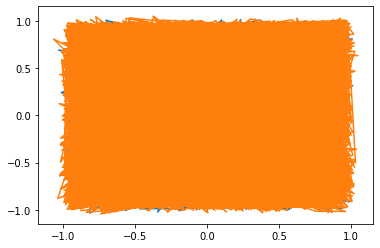

In [59]:
plt.plot(df[0][df[2]==1],df[1][df[2]==1])
plt.plot(df[0][df[2]==-1],df[1][df[2]==-1])

In [60]:
training_inputs = torch.from_numpy(training_inputs)
training_outputs = torch.from_numpy(training_outputs)
validation_inputs = torch.from_numpy(validation_inputs)
validation_outputs = torch.from_numpy(validation_outputs)


## Define the neural net

In [80]:
M1 = 1000
M2 = 1000

In [81]:
seq_model = nn.Sequential(
            nn.Linear(2, M1), 
            nn.Tanh(),
            nn.Linear(M1,M2), 
            nn.Tanh(),
            nn.Linear(M2, 1), 
            nn.Tanh())
seq_model

Sequential(
  (0): Linear(in_features=2, out_features=1000, bias=True)
  (1): Tanh()
  (2): Linear(in_features=1000, out_features=1000, bias=True)
  (3): Tanh()
  (4): Linear(in_features=1000, out_features=1, bias=True)
  (5): Tanh()
)

In [82]:
test = nn.Linear(2, 1)

In [83]:
training_inputs.shape

torch.Size([10000, 2])

In [84]:
seq_model(training_inputs.float())

tensor([[ 0.1721],
        [ 0.0675],
        [ 0.1288],
        ...,
        [-0.0410],
        [-0.0298],
        [ 0.0801]], grad_fn=<TanhBackward>)

In [85]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [86]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [87]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = training_inputs.float(),
    t_u_val = validation_inputs.float(), 
    t_c_train = training_outputs.float(),
    t_c_val = validation_outputs.float())

Epoch 1, Training loss 1.0783, Validation loss 1.0778
Epoch 1000, Training loss 0.5066, Validation loss 0.5196
Epoch 2000, Training loss 0.5049, Validation loss 0.5177


KeyboardInterrupt: 